In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
import pytesseract
import cv2
from PIL import Image, ImageEnhance, ImageFilter

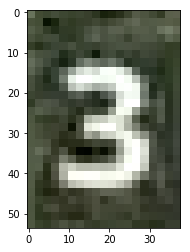

In [23]:
## Load original image
image_path = os.path.join(os.environ.get("DATA_DIR"),'3.png')
# read the image file in a numpy array
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)


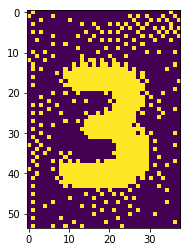

In [24]:
# Experiment 1
im = Image.open(image_path) # the second one
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)
im = im.convert('1')
im.save(os.environ.get("SHARED_OUTPUT_DIR")+'temp1.png')
text = pytesseract.image_to_string(Image.open(os.environ.get("SHARED_OUTPUT_DIR")+'temp1.png'))
print(text)
temp_image_path = os.path.join(os.environ.get("SHARED_OUTPUT_DIR")+'temp1.png')
# read the image file in a numpy array
img = mpimg.imread(temp_image_path)
imgplot = plt.imshow(img)

(54, 38, 3)
L.'J


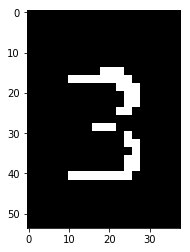

In [25]:
# Experiment 2
def _thresh_words(img, white_thresh=230):
    if img is None:
        return
    print img.shape
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if all([elem >= white_thresh for elem in img[i][j]]):
                img[i][j] = (255, 255, 255)
            else:
                img[i][j] = (0, 0, 0)
    cv2.imwrite(os.environ.get("SHARED_OUTPUT_DIR")+'ex2_1.png', img)

def _exec_tesseract(temp_path):
     cmd = 'env TESSDATA_PREFIX=./ tesseract -l joh %s %s > /dev/null' % (self._tmp_image_fname, self._tmp_txt_base)
     os.system(cmd)
    
img = cv2.imread(image_path)
image_threshold = _thresh_words(img)
temp_image_path = os.path.join(os.environ.get("SHARED_OUTPUT_DIR")+'ex2_1.png')
# read the image file in a numpy array
img1 = mpimg.imread(temp_image_path)
plt.imshow(img1)
text = pytesseract.image_to_string(Image.open(temp_image_path))
print text

In [14]:
#http://stackoverflow.com/questions/18813300/finding-the-coordinates-of-maxima-in-an-image
import os
from PIL import *
from PIL import Image

im111 = Image.open(os.environ.get("DATA_DIR")+'/3.png')

In [27]:
import numpy as np
from skimage import io
from skimage import img_as_float
from scipy.ndimage import gaussian_filter
from skimage.morphology import reconstruction
import pytesseract

<class 'PIL.Image.Image'>



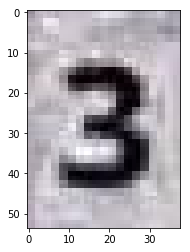

In [28]:
im = np.array(image * 255, dtype = np.uint8)
a = np.asarray(im)
img = Image.fromarray(a)

img.show()

print type(img)
img.save(os.environ.get("SHARED_OUTPUT_DIR")+'RegionalMaximaPIL.jpg')

img1 = mpimg.imread(os.environ.get("SHARED_OUTPUT_DIR")+'RegionalMaximaPIL.jpg')
plt.imshow(img1)
text = pytesseract.image_to_string(Image.open(os.environ.get("SHARED_OUTPUT_DIR")+'RegionalMaximaPIL.jpg'))
print text

In [53]:
# Working over image for number of kills 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = Image.open(os.environ.get("DATA_DIR")+'/3.png')
#image = Image.open(os.environ.get("DATA_DIR")+'/hard.png')
# image = Image.open(os.environ.get("DATA_DIR")+'/1.png')
basewidth = 100
wpercent = (basewidth / float(image.size[0]))
hsize = int((float(im111.size[1]) * float(wpercent)))
image_resized = im111.resize((basewidth, hsize), Image.ANTIALIAS)
image = gaussian_filter(image, 0.4)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')


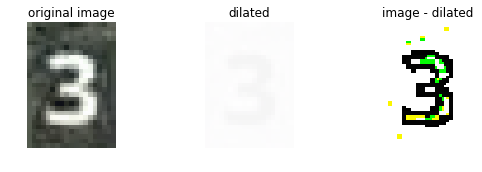

In [54]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')
ax0.set_adjustable('box-forced')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')
ax1.set_adjustable('box-forced')

img_mid = image - dilated
ax2.imshow(img_mid, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')
ax2.set_adjustable('box-forced')

fig.tight_layout()

img_sub_dilated = img_mid
image_1 = Image.fromarray(np.uint8(img_sub_dilated))
text = pytesseract.image_to_string(image_1)
print text

In [42]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [43]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [44]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [45]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [46]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
210s - loss: 0.2311 - acc: 0.9345 - val_loss: 0.0829 - val_acc: 0.9740
Epoch 2/10
210s - loss: 0.0738 - acc: 0.9780 - val_loss: 0.0463 - val_acc: 0.9840
Epoch 3/10
211s - loss: 0.0534 - acc: 0.9838 - val_loss: 0.0438 - val_acc: 0.9855
Epoch 4/10
211s - loss: 0.0404 - acc: 0.9879 - val_loss: 0.0403 - val_acc: 0.9864
Epoch 5/10
211s - loss: 0.0336 - acc: 0.9894 - val_loss: 0.0341 - val_acc: 0.9882
Epoch 6/10
211s - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0312 - val_acc: 0.9895
Epoch 7/10
211s - loss: 0.0232 - acc: 0.9928 - val_loss: 0.0338 - val_acc: 0.9882
Epoch 8/10
211s - loss: 0.0201 - acc: 0.9936 - val_loss: 0.0316 - val_acc: 0.9890
Epoch 9/10
211s - loss: 0.0165 - acc: 0.9947 - val_loss: 0.0294 - val_acc: 0.9904
Epoch 10/10
211s - loss: 0.0144 - acc: 0.9956 - val_loss: 0.0302 - val_acc: 0.9904
Baseline Error: 0.96%


In [48]:
print type(X_test)
print X_test.shape
X_ex = X_test[1:2,:,:,:]
print X_ex.shape

predictions = model.predict(X_ex)
print np.argmax(predictions[0])


# serialize model to JSON
model_json = model.to_json()
with open(os.environ.get("SHARED_OUTPUT_DIR")+"/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(os.environ.get("SHARED_OUTPUT_DIR")+"/model.h5")
print("Saved model to disk")

# later...
# load json and create model
json_file = open(os.environ.get("SHARED_OUTPUT_DIR")+'/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(os.environ("SHARED_OUTPUT_DIR")+"/model.h5")
print("Loaded model from disk")

<type 'numpy.ndarray'>
(10000, 1, 28, 28)
(1, 1, 28, 28)
2


AttributeError: _Environ instance has no __call__ method

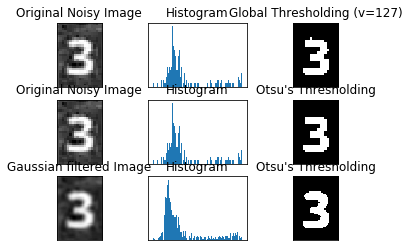

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
image_path = os.environ.get("DATA_DIR")+'/3.png'
img = cv2.imread(image_path,0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
y = cv2.resize(th3,(28,28), interpolation = cv2.INTER_CUBIC)
y = np.expand_dims(y, axis=0)
y = np.expand_dims(y, axis=0)

In [3]:
from keras.models import model_from_json
# later...
# load json and create model
json_file = open(os.environ.get("SHARED_OUTPUT_DIR")+'/model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# load weights into new model
model.load_weights(os.environ.get("SHARED_OUTPUT_DIR")+"/model.h5")
print("Loaded model from disk")

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Loaded model from disk


In [4]:
test_example = th3
predictions = model.predict(y)
print np.argmax(predictions[0])

3


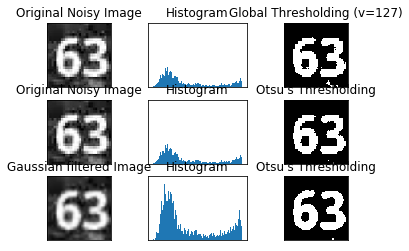

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
image_path = os.environ.get("DATA_DIR")+'/63.png'
img = cv2.imread(image_path,0)
img = cv2.resize(img,(80,80), interpolation = cv2.INTER_CUBIC)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

(80, 80)
80 80
(80, 45)
(80, 40)


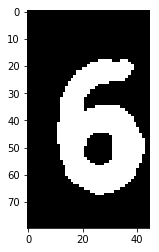

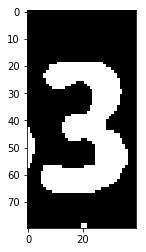

In [6]:
print th3.shape
x, y = th3.shape[0],th3.shape[1]
print x, y
th3_left = th3[:,:x/2+5]
print th3_left.shape
th3_right = th3[:,x/2:]
print th3_right.shape
plt.imshow(th3_left,'gray')
plt.show()
y_left = cv2.resize(th3_left,(28,28), interpolation = cv2.INTER_CUBIC)
y_left = np.expand_dims(y_left, axis=0)
y_left = np.expand_dims(y_left, axis=0)

plt.imshow(th3_right,'gray')
plt.show()
y_right = cv2.resize(th3_right,(28,28), interpolation = cv2.INTER_CUBIC)
y_right = np.expand_dims(y_right, axis=0)
y_right = np.expand_dims(y_right, axis=0)

In [7]:
import numpy
import os
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import model_from_json

# later...
# load json and create model
json_file = open(os.environ.get("SHARED_OUTPUT_DIR")+'/model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# load weights into new model
model.load_weights(os.environ.get("SHARED_OUTPUT_DIR")+"/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [8]:
predictions = model.predict(y_left)
print np.argmax(predictions[0])
print np.max(predictions[0])

6
1.0


In [9]:
predictions = model.predict(y_right)
print np.argmax(predictions[0])
print np.max(predictions[0])

3
1.0


In [62]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import model_from_json

# later...
# load json and create model
json_file = open(os.environ.get("SHARED_OUTPUT_DIR")+'/model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# load weights into new model
model.load_weights(os.environ.get("SHARED_OUTPUT_DIR")+"/model.h5")
print("Loaded model from disk")

def predict_digits(image):
    image = cv2.resize(image,(28,28), interpolation = cv2.INTER_CUBIC)
    image = np.expand_dims(image, axis=0)
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    pred_digit = np.argmax(predictions[0])
    prob_pred_digit = np.max(predictions[0])
#     print prob_pred_digit
    return pred_digit

Loaded model from disk


In [63]:
import cv2
import os
import numpy as np
import copy
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
image_path = os.environ.get("DATA_DIR")+'/63.png'
img = cv2.imread(image_path,0)
print type(img)
img = cv2.resize(img,(80,80), interpolation = cv2.INTER_CUBIC)
print type(img)
blur = cv2.GaussianBlur(img,(5,5),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

##################      Now finding Contours         ###################

contours,hierarchy = cv2.findContours(copy.copy(th),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) 

pred_digits = []
x_coords = []
roi_images = []
buff = 3
for cnt in contours:
    if cv2.contourArea(cnt)>40:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if  h>30:
            cv2.rectangle(th3,(x,y),(x+w,y+h),(0,0,255),1)
            try:
                roi = th[y-buff:y+h+buff,x-buff:x+w+buff]        
            except:
                roi = th[y:y+h,x:x+w]            
            roi_images.append(roi)
            x_coords.append(x)

sorted_roi_images = [image for (x_coord,image) in sorted(zip(x_coords,roi_images))]
for image in sorted_roi_images:
    try:
        pred_digit = predict_digits(image)
        pred_digits.append(str(pred_digit))
    except:
        pass

print ''.join(pred_digits)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
63


In [32]:
import cv2
import os
import numpy as np
import copy
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.morphology import reconstruction
from PIL import Image

def extract_text(image, ratio=[0.697,0.744,0.468,0.534]):
    #ratio=[0.697,0.746,0.468,0.534]
    image = np.asarray(image)
    y1 = int(image.shape[0] * ratio[0])
    y2 = int(image.shape[0] * ratio[1])
    x1 = int(image.shape[1] * ratio[2])
    x2 = int(image.shape[1] * ratio[3])
    img_first = image[y1:y2, x1:x2]
    img = cv2.cvtColor(img_first, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(70,70), interpolation = cv2.INTER_CUBIC)
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    ##################      Now finding Contours         ###################

    contours,hierarchy = cv2.findContours(copy.copy(th),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

    pred_digits = []
    x_coords = []
    roi_images = []
    buff = 3
    for cnt in contours:
        if cv2.contourArea(cnt)>40:
            [x,y,w,h] = cv2.boundingRect(cnt)
            if  h>30 and w>8:
                cv2.rectangle(th,(x,y),(x+w,y+h),(0,0,255),1)
                try:
                    roi = th[y-buff:y+h+buff,x-buff:x+w+buff]            
                except:
                    roi = th[y:y+h,x:x+w]            
                roi_images.append(roi)
                x_coords.append(x)

    sorted_roi_images = [image for (x_coord,image) in sorted(zip(x_coords,roi_images))]
    for image in sorted_roi_images:
        try:
            pred_digit = predict_digits(image)
            pred_digits.append(str(pred_digit))
        except:
            pass

    text = ''.join(pred_digits)
    return text

image = Image.open(os.environ.get("DATA_DIR")+'/output.png')
# print extract_text(image,ratio=[0.027,0.062,0.8713,0.8854])
print extract_text(image,ratio=[0.027,0.062,0.94,0.9541])

In [71]:
# ratio = [0.027,0.062,0.8713,0.8854]
#ratio = [0.028,0.062,0.94,0.9541]
ratio = [0.697,0.744,0.468,0.534]
image = np.asarray(image)
y1 = int(image.shape[0] * ratio[0])
y2 = int(image.shape[0] * ratio[1])
x1 = int(image.shape[1] * ratio[2])
x2 = int(image.shape[1] * ratio[3])
# img = image[y1:y2, x1:x2]
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img,(70,70), interpolation = cv2.INTER_CUBIC)
# blur = cv2.GaussianBlur(img,(5,5),0)
# ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

basewidth = 1000
wpercent = (basewidth / float(image.size[0]))
hsize = int((float(image.size[1]) * float(wpercent)))
image_resized = image.resize((basewidth, hsize), Image.ANTIALIAS)
image = gaussian_filter(image, 0.4)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

plt.imshow(img,'gray')
plt.show()

IndexError: tuple index out of range

(169, 18)
1000 106
1 contours


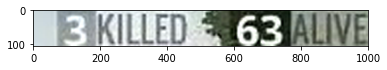

In [76]:
image = Image.open(os.environ.get("DATA_DIR")+'/output.png')

ratio =[0.034,0.0592,0.8525,0.9851]
image = np.asarray(image)
y1 = int(image.shape[0] * ratio[0])
y2 = int(image.shape[0] * ratio[1])
x1 = int(image.shape[1] * ratio[2])
x2 = int(image.shape[1] * ratio[3])
image = image[y1:y2, x1:x2]

image = Image.fromarray(image)
basewidth = 1000
print image.size
wpercent = (basewidth / float(image.size[0]))
hsize = int(((float(image.size[1]) * float(wpercent))))
image_resized = image.resize((basewidth, hsize), Image.ANTIALIAS)

length = image_resized.size[0]
width =  image_resized.size[1]
print length, width

x_coord_sel = range(1000/50*2)

pred_digits = []
x_coords = []
roi_images = []
buff = 3
print len(contours), "contours"
for cnt in contours:
    if cv2.contourArea(cnt)>40:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if  h>30:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),1)
            try:
                roi = image[y-buff:y+h+buff,x-buff:x+w+buff]            
            except:
                roi = image[y:y+h,x:x+w]            
            roi_images.append(roi)
            x_coords.append(x)           

plt.imshow(image_resized,'gray')
plt.show()



# sorted_roi_images = [image for (x_coord,image) in sorted(zip(x_coords,roi_images))]
# print len(sorted_roi_images)
# for image in sorted_roi_images:
#     try:
#         pred_digit = predict_digits(image)
#         pred_digits.append(str(pred_digit))
#     except:
#         pass
# print pred_digits
# print cv2.boundingRect(cnt)
# # plt.imshow(image,'gray')
# # plt.show() 

In [66]:
# Taking intersection over few previous frames
import imageio
import math
imageio.plugins.ffmpeg.download()


def index_images_from_stream(stream_url, delay, ocr_extraction=True):
            """
            Sample images from a live stream at regular intervals.
            :param stream_url: url where the stream is located
            :param delay: millisecond delay between sampled images
            :return: image_batch - NxCxHxW - (num images)x(dims of image) converted w/ image_to_caffe_format
            """
            # Save images into temporary directory specific to this stream.
            print "Reading from video stream and saving it as numpy array..."
            video_reader = imageio.get_reader(stream_url)
            video_info = video_reader.get_meta_data()
            print "Calculate the times and frames to sample."
            delta = float(video_info['duration']) / video_info['nframes']
            frame_times = []
            seek_time = float(0)

            while seek_time < video_info['duration']:
                frame_times.append(seek_time)
                seek_time+=(float(delay)/1000)

            frame_indices = [int(math.floor(float(frame_time) / delta)) for frame_time in frame_times]

            print "Extracting tags and frames one by one reading through imageio video_reader"
            
            ocr_response_frames = []
            ocr_frame_times = []
            num_kill_frames = []
            num_alive_frames = []
            
            try:
                for ind, frame in enumerate(video_reader):
                    sampled_frame = []
                    if ind in frame_indices:
                        num_kill = extract_text(image,ratio=[0.027,0.062,0.8713,0.8854])
                        num_alive = extract_text(image,ratio=[0.028,0.062,0.94,0.9541])
                        print "num_kill", num_kill, "num_alive", num_alive
                        if num_kill and num_alive:
                            frame_time = frame_times[frame_indices.index(ind)]
                            num_kill_frames.append(num_kill)
                            num_alive_frames.append(num_alive)                            
                            ocr_frame_times.append(frame_time)

            except Exception as e:
                print e
                print "There was an error reading a frame. Other frames available in sampled_frames."

            print num_kill_frames, num_alive_frames, ocr_frame_times

            return num_kill_frames, num_alive_frames, ocr_frame_times
        
stream_url = 'http://d1playscdntv-a.akamaihd.net/video/GvaagNrIs0F/processed/720H.mp4'
index_images_from_stream(stream_url, 1000, ocr_extraction=True)

Reading from video stream and saving it as numpy array...
Calculate the times and frames to sample.
Extracting tags and frames one by one reading through imageio video_reader
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
num_kill 2 num_alive 
[] [] []


([], [], [])

In [1]:
# Working over image for number of kills 
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import imageio
import os
from PIL import Image

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction


# Convert to float: Important for subtraction later which won't work with uint8


def extract_text(image, ratio=[0.697,0.744,0.468,0.534]):
    #ratio=[0.697,0.746,0.468,0.534]
    image = np.asarray(image)
    y1 = int(image.shape[0] * ratio[0])
    y2 = int(image.shape[0] * ratio[1])
    x1 = int(image.shape[1] * ratio[2])
    x2 = int(image.shape[1] * ratio[3])
    image = image[y1:y2, x1:x2]
    image = Image.fromarray(image)

    basewidth = 1000
    wpercent = (basewidth / float(image.size[0]))
    hsize = int((float(image.size[1]) * float(wpercent)))
    image_resized = image.resize((basewidth, hsize), Image.ANTIALIAS)
    image = gaussian_filter(image, 0.4)

    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image

    dilated = reconstruction(seed, mask, method='dilation')

    img_mid = image - dilated

    img_sub_dilated = img_mid
    image_1 = Image.fromarray(np.uint8(img_sub_dilated))
    image_test = Image.fromarray(np.uint8(image))
    text = pytesseract.image_to_string(image_1)
    
    return text
   

In [2]:
import os
import cv2
import copy
from PIL import Image
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction


# Convert to float: Important for subtraction later which won't work with uint8


def extract_text_otsu(image, ratio=[0.697,0.744,0.468,0.534]):
    #ratio=[0.697,0.746,0.468,0.534]
    image = np.asarray(image)
    y1 = int(image.shape[0] * ratio[0])
    y2 = int(image.shape[0] * ratio[1])
    x1 = int(image.shape[1] * ratio[2])
    x2 = int(image.shape[1] * ratio[3])
    image = image[y1:y2, x1:x2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(70,70), interpolation = cv2.INTER_CUBIC)
    blur = cv2.GaussianBlur(image,(5,5),0)
    ret,th = cv2.threshold(copy.copy(blur),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    image = Image.fromarray(np.uint8(th))
    text = pytesseract.image_to_string(image)
    
    return text
   

In [19]:
# Taking intersection over few previous frames
import imageio
import math
import numpy as np
from matplotlib import pyplot as plt
imageio.plugins.ffmpeg.download()

def index_images_from_stream(stream_url, delay, ocr_extraction=True):
            """
            Sample images from a live stream at regular intervals.
            :param stream_url: url where the stream is located
            :param delay: millisecond delay between sampled images
            :return: image_batch - NxCxHxW - (num images)x(dims of image) converted w/ image_to_caffe_format
            """
            # Save images into temporary directory specific to this stream.
            print "Reading from video stream and saving it as numpy array..."
            video_reader = imageio.get_reader(stream_url)
            video_info = video_reader.get_meta_data()
            print "Calculate the times and frames to sample."
            delta = float(video_info['duration']) / video_info['nframes']
            frame_times = []
            seek_time = float(0)

            while seek_time < video_info['duration']:
                frame_times.append(seek_time)
                seek_time+=(float(delay)/1000)

            frame_indices = [int(math.floor(float(frame_time) / delta)) for frame_time in frame_times]

            print "Extracting tags and frames one by one reading through imageio video_reader"
            
            
            ocr_response_frames = []
            ocr_frame_times = []
            prev_frame_index = []
            prev_frames = []
            max_length = 5
            try:
                for ind, frame in enumerate(video_reader):
                    sampled_frame = []                    
                    if ind in frame_indices:                        
                        frame_time = frame_times[frame_indices.index(ind)]
                        print type(frame)
                        if len(prev_frames) != max_length:
                            prev_frames.append(frame)
                        else:
                            prev_frames = prev_frames[1:]+[frame]
                        new_frame = copy.copy(frame)
                        if frame_time == 25.0:
                            for prev_frame in prev_frames[:max_length]:
                                new_frame &=prev_frame                                
#                             print "number of kills"
#                             ratio = [0.697,0.744,0.468,0.534]
#                             ratio = [0.028,0.062,0.94,0.9541]\
                            ratio = [0.6638,0.6986,0.3539,0.6484]                                    
                            new_frame = np.asarray(new_frame)
                            y1 = int(new_frame.shape[0] * ratio[0])
                            y2 = int(new_frame.shape[0] * ratio[1])
                            x1 = int(new_frame.shape[1] * ratio[2])
                            x2 = int(new_frame.shape[1] * ratio[3])
                            new_frame = new_frame[y1:y2, x1:x2]
                            plt.imshow(new_frame)
                            plt.show()
                            break

                        ocr_text = extract_text(new_frame,ratio=ratio)
                        ocr_text_otsu = extract_text_otsu(new_frame,ratio=ratio)
                        if ocr_text:
                            ocr_response_frames.append(ocr_text)
                            ocr_frame_times.append(frame_time)
            except Exception as e:
                print e
                print "There was an error reading a frame. Other frames available in sampled_frames."

            print ocr_response_frames, ocr_frame_times

            return ocr_response_frames, ocr_frame_times
        
stream_url = 'http://d1playscdntv-a.akamaihd.net/video/GvaagNrIs0F/processed/720H.mp4'
index_images_from_stream(stream_url, 1000, ocr_extraction=True)

Reading from video stream and saving it as numpy array...
Calculate the times and frames to sample.
Extracting tags and frames one by one reading through imageio video_reader
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL.Image.Image'>
<class 'imageio.core.util.Image'>
<class 'PIL

([], [])

In [ ]:
# Taking intersection over few previous frames
import imageio
import math
import numpy as np
from matplotlib import pyplot as plt
imageio.plugins.ffmpeg.download()

def index_images_from_stream(stream_url, delay, ocr_extraction=True):
            """
            Sample images from a live stream at regular intervals.
            :param stream_url: url where the stream is located
            :param delay: millisecond delay between sampled images
            :return: image_batch - NxCxHxW - (num images)x(dims of image) converted w/ image_to_caffe_format
            """
            # Save images into temporary directory specific to this stream.
            print "Reading from video stream and saving it as numpy array..."
            video_reader = imageio.get_reader(stream_url)
            video_info = video_reader.get_meta_data()
            print "Calculate the times and frames to sample."
            delta = float(video_info['duration']) / video_info['nframes']
            frame_times = []
            seek_time = float(0)

            while seek_time < video_info['duration']:
                frame_times.append(seek_time)
                seek_time+=(float(delay)/1000)

            frame_indices = [int(math.floor(float(frame_time) / delta)) for frame_time in frame_times]

            print "Extracting tags and frames one by one reading through imageio video_reader"
            
            
            ocr_response_frames = []
            ocr_frame_times = []
            prev_frame_index = []
            prev_frames = []
            max_length = 5
            try:
                for ind, frame in enumerate(video_reader):
                    sampled_frame = []                    
                    if ind in frame_indices:                        
                        frame_time = frame_times[frame_indices.index(ind)]
                        print type(frame)
                        frame = np.asarray(frame)
                        frame = Image.fromarray(frame)
                        print type(frame)
                        frame = frame.convert('L')
                        frame = np.asarray(frame)
                        if len(prev_frames) != max_length:
                            prev_frames.append(frame)
                        else:
                            prev_frames = prev_frames[1:]+[frame]
                        new_frame = copy.copy(frame)
                        if frame_time == 25.0:
                            for prev_frame in prev_frames[:max_length]:
                                new_frame &=prev_frame                                
#                             print "number of kills"
#                             ratio = [0.697,0.744,0.468,0.534]
#                             ratio = [0.028,0.062,0.94,0.9541]
                            print "line"
                            ratio = [0.6638,0.6986,0.3539,0.6484]                                    
                            print extract_text(new_frame,ratio=ratio)
                            print extract_text_otsu(new_frame,ratio=ratio)    
                            new_frame = np.asarray(new_frame)
                            y1 = int(new_frame.shape[0] * ratio[0])
                            y2 = int(new_frame.shape[0] * ratio[1])
                            x1 = int(new_frame.shape[1] * ratio[2])
                            x2 = int(new_frame.shape[1] * ratio[3])
                            new_frame = new_frame[y1:y2, x1:x2]
                            plt.imshow(new_frame)
                            plt.show()
                            break
#                         new_frame = frame - prev_frames[0]            
# #                         print "number of kills"
# #                         ratio = [0.697,0.744,0.468,0.534]
# #                         ratio = [0.028,0.062,0.94,0.9541]
#                         print "line"
#                         ratio = [0.6638,0.6986,0.3539,0.6484]        
#                         new_frame = np.asarray(new_frame)
#                         y1 = int(new_frame.shape[0] * ratio[0])
#                         y2 = int(new_frame.shape[0] * ratio[1])
#                         x1 = int(new_frame.shape[1] * ratio[2])
#                         x2 = int(new_frame.shape[1] * ratio[3])
#                         new_frame = new_frame[y1:y2, x1:x2]
#                         ocr_text = extract_text(new_frame,ratio=ratio)
#                         ocr_text_otsu = extract_text_otsu(new_frame,ratio=ratio)
#                         if ocr_text:
#                             ocr_response_frames.append(ocr_text)
#                             ocr_frame_times.append(frame_time)
            except Exception as e:
                print e
                print "There was an error reading a frame. Other frames available in sampled_frames."

            print ocr_response_frames, ocr_frame_times

            return ocr_response_frames, ocr_frame_times
        
stream_url = 'http://d1playscdntv-a.akamaihd.net/video/GvaagNrIs0F/processed/720H.mp4'
index_images_from_stream(stream_url, 1000, ocr_extraction=True)

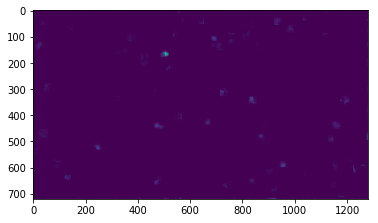

In [2]:
import cv2
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(os.environ.get("DATA_DIR")+'/720H.mp4')
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
i = 0
while(1):
    i+=1
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, 0.5, 3, 15, 3, 5, 1.2, 0)
#         prev_gray,gray,0.5,1,3,15,3,5,1
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    mag_normalized = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    mag_normalized = mag_normalized.astype('uint8')
#     hsv[...,0] = ang*180/np.pi/2
#     hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
#     bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
#     cv2.imshow('frame2',bgr)
    imgplot = plt.imshow(mag_normalized)
    break
#     k = cv2.waitKey(30) & 0xff
#     if k == 27:
#         break
#     elif k == ord('s'):
#         cv2.imwrite('opticalfb.png',frame2)
#         cv2.imwrite('opticalhsv.png',bgr)
    prvs = next
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Taking intersection over few previous frames
import imageio
import math
import numpy as np
from matplotlib import pyplot as plt
imageio.plugins.ffmpeg.download()

def index_images_from_stream(stream_url, delay, ocr_extraction=True):
            """
            Sample images from a live stream at regular intervals.
            :param stream_url: url where the stream is located
            :param delay: millisecond delay between sampled images
            :return: image_batch - NxCxHxW - (num images)x(dims of image) converted w/ image_to_caffe_format
            """
            # Save images into temporary directory specific to this stream.
            print "Reading from video stream and saving it as numpy array..."
            video_reader = imageio.get_reader(stream_url)
            video_info = video_reader.get_meta_data()
            print "Calculate the times and frames to sample."
            delta = float(video_info['duration']) / video_info['nframes']
            frame_times = []
            seek_time = float(0)

            while seek_time < video_info['duration']:
                frame_times.append(seek_time)
                seek_time+=(float(delay)/1000)

            frame_indices = [int(math.floor(float(frame_time) / delta)) for frame_time in frame_times]

            print "Extracting tags and frames one by one reading through imageio video_reader"
            
            
            ocr_response_frames = []
            ocr_frame_times = []
            prev_frame_index = []
            prev_frames = []
            max_length = 5
            try:
                for ind, frame in enumerate(video_reader):
                    sampled_frame = []                    
                    if ind in frame_indices:                        
                        frame_time = frame_times[frame_indices.index(ind)]
                        print type(frame)
                        frame = np.asarray(frame)
                        frame = Image.fromarray(frame)
                        print type(frame)
                        frame = frame.convert('L')
                        frame = np.asarray(frame)
                        if len(prev_frames) != max_length:
                            prev_frames.append(frame)
                        else:
                            prev_frames = prev_frames[1:]+[frame]
                        new_frame = copy.copy(frame)
                        if frame_time == 25.0:
                            for prev_frame in prev_frames[:max_length]:
                                new_frame &=prev_frame                                
                            print "line"
                            ratio = [0.6638,0.6986,0.3539,0.6484]                                    
                            print extract_text(new_frame,ratio=ratio)
                            print extract_text_otsu(new_frame,ratio=ratio)    
                            new_frame = np.asarray(new_frame)
                            y1 = int(new_frame.shape[0] * ratio[0])
                            y2 = int(new_frame.shape[0] * ratio[1])
                            x1 = int(new_frame.shape[1] * ratio[2])
                            x2 = int(new_frame.shape[1] * ratio[3])
                            new_frame = new_frame[y1:y2, x1:x2]
                            plt.imshow(new_frame)
                            plt.show()
                            break
            except Exception as e:
                print e
                print "There was an error reading a frame. Other frames available in sampled_frames."

            print ocr_response_frames, ocr_frame_times

            return ocr_response_frames, ocr_frame_times
        
stream_url = 'http://d1playscdntv-a.akamaihd.net/video/GvaagNrIs0F/processed/720H.mp4'
index_images_from_stream(stream_url, 1000, ocr_extraction=True)